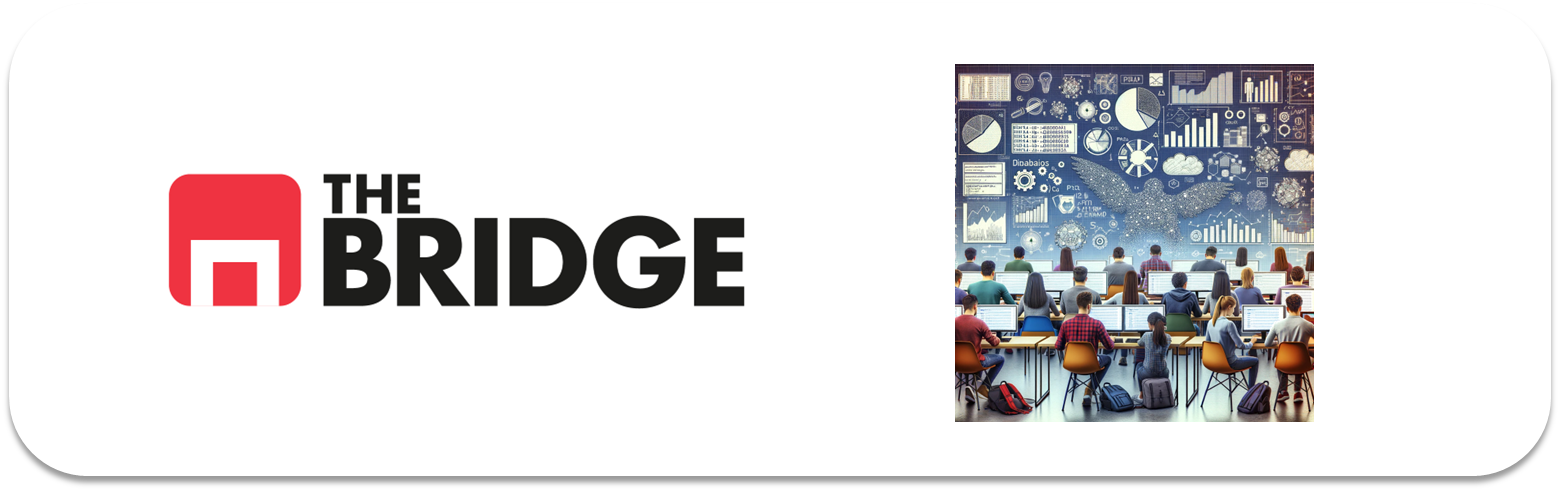

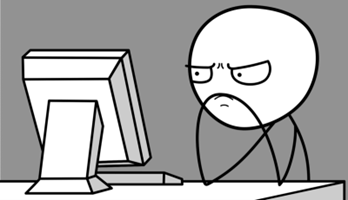

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import seaborn as sns

### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [2]:
anuncios = pd.read_csv("./data/advertising_ml.csv") 
anuncios.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


- **En la columna "Age" sería conveniente borrar 'years'.**
- **La columna "City" no tiene ni pies ni cabeza** (aunque según los notebooks no deberíamos "familiarizarnos" con los datos).
- **Las columnas "Male" y "Clicked on Ad" podrían ser convertidas a booleanas**.
- **La columna "Timestamp" podría pasarse a formato fecha y, entre paréntesis, explicarse brevemente**.
- **En la columna 'Area Income' no sabemos la moneda**.



### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

- **Se trata de un problema de clasificación, binaria en este caso.**
- **Dado que tenemos un conjunto de datos con el que entrenar al modelo estamos hablando de un aprendizaje supervisado.**
- **La variable target es la columna "Clicked on Ad".**

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

In [3]:
cardinalidad_col1 = anuncios['Daily Time Spent on Site'].nunique()
print("Cardinalidad de la columna 'Daily Time Spent on Site':", cardinalidad_col1)

Cardinalidad de la columna 'Daily Time Spent on Site': 900


- La **primera columna**, "Daily Time Spent on Site", tiene una cardinalidad de 900. En pandas se clasificaría como una **variable numérica continua**.


In [4]:
cardinalidad_col2 = anuncios['Age'].nunique()
print("Cardinalidad de la segunda 'Age':", cardinalidad_col2)

Cardinalidad de la segunda 'Age': 83


- La **segunda columna**, "Age", tiene una cardinalidad de 83, representando la edad del internauta de cada entrada. En pandas se clasificaría como una **variable numérica discreta**.  
Es del tipo "objecto" lo cual no es lo más conveniente; tipo "float64" sería más apropiado. Para lograr esto, sería necesario eliminar las palabras "years" de cada celda.



In [5]:
cardinalidad_col3 = anuncios['Area Income'].nunique()
print("Cardinalidad de la tercera columna, 'Area Income':", cardinalidad_col3)

Cardinalidad de la tercera columna, 'Area Income': 1000


- La **tercera columna**, "Area Income", tiene una cardinalidad de 1000, representando los ingresos, entiendo que medios, del área del internauta.  
En pandas se clasificaría como una **variable numérica continua**.  
Es del tipo "float64", lo cual es correcto. No tenemos información sobre en qué moneda está expresado.



In [6]:
cardinalidad_col4 = anuncios['Daily Internet Usage'].nunique()
print("Cardinalidad de la cuarta columna, 'Daily Internet Usage':", cardinalidad_col4)

Cardinalidad de la cuarta columna, 'Daily Internet Usage': 966


- La **cuarta columna**, "Daily Internet Usage", tiene una cardinalidad de 966, representando el tiempo en internet, doy por hecho que está medido en minutos, del internauta.  
En pandas se clasificaría como una **variable numérica continua**.  
Es del tipo "float64", lo cual es correcto. 

In [7]:
cardinalidad_col5 = anuncios['Ad Topic Line'].nunique()
print("Cardinalidad de la quinta columna, 'Ad Topic Line':", cardinalidad_col5)

Cardinalidad de la quinta columna, 'Ad Topic Line': 1000


- La **quinta columna**, "Ad Topic Line", tiene una cardinalidad de 1000, representando la frase usada en el anuncio.  
En pandas se clasificaría como una **variable categórica**.  
Es del tipo "object", y la cardinalidad de 1000 es demasiado alta para una variable categórica. Sería una buena idea categorizar las frases para reducir la cardinalidad.


In [8]:
cardinalidad_col6 = anuncios['City'].nunique()
print("Cardinalidad de la sexta columna, 'city':", cardinalidad_col6)

Cardinalidad de la sexta columna, 'city': 969


- **La sexta columna, "City"**, tiene una cardinalidad de 969 y es del tipo "object". En pandas, se clasificaría como una **variable categórica**. "City" significa ciudad, pero las entradas no tienen sentido y no concuerdan con la columna, por lo que podría ser eliminada.


In [9]:
cardinalidad_col7 = anuncios['Male'].nunique()
print("Cardinalidad de la septima columna, 'Male':", cardinalidad_col7)

Cardinalidad de la septima columna, 'Male': 2


- **La septima columna, "Male"**, es una columna **booleana**, por lo que su cardinalidad es 2. Para pandas, se clasificaría como una **variable categórica**. En ella se indica si el internauta es o no hombre, es del tipo "object", y los valores de entrada son 0 y 1. Sería conveniente pasarla al tipo de dato booleano.


In [10]:
cardinalidad_col8 = anuncios['Country'].nunique()
print("Cardinalidad de la octava columna, 'Country':", cardinalidad_col8)

Cardinalidad de la octava columna, 'Country': 237


- **La cardinalidad de la octava columna, 'Country'**, es 237. Representa el país del internauta. Para pandas, se clasificaría como **variable categórica**.


In [11]:
cardinalidad_col9 = anuncios['Timestamp'].nunique()
print("Cardinalidad de la novena columna, 'Timestamp':", cardinalidad_col9)

Cardinalidad de la novena columna, 'Timestamp': 1000


- La **cardinalidad** de la novena columna, 'Timestamp', es 1000. Parece ser la fecha y hora a la que se tomaron los datos. Para pandas, es una **variable numérica**.
Es del tipo "object", lo cual no es conveniente. Sería mejor convertirlo a tipo "datetime".

In [12]:
cardinalidad_col10 = anuncios['Clicked on Ad'].nunique()
print("Cardinalidad de la decima columna, 'Clicked on Ad':", cardinalidad_col10)

Cardinalidad de la decima columna, 'Clicked on Ad': 2


- La cardinalidad de la decima columna, 'Timestamp' es 2, como antes es una bolena, y por tanto categorica, que esta en tipo int64 y debe ser pasada a booleana. 
es nuestro target.

### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

### Para la limpieza, no necesito "rellenar" ningún nulo, solo eliminar alguna columna, cambiar el tipo de objeto y eliminar la palabra "years" de las entradas. Por tanto, lo haré.

In [13]:
anuncios['Age'] = anuncios['Age'].str.replace(r'\D', '', regex=True)  # Con esto, cualquier cosa que no sea un número se cambia por una cadena vacía.
anuncios['Age'] = anuncios['Age'].astype(int)  # Y con esto, lo convertimos en un número entero.

In [14]:
anuncios.drop('City', axis=1, inplace=True)

In [15]:
anuncios['Male'] = anuncios['Male'].astype(bool)

In [16]:
anuncios['Timestamp'] = pd.to_datetime(anuncios['Timestamp'], format='%Y-%m-%d %H:%M:%S')

In [17]:
anuncios['Clicked on Ad'] = anuncios['Clicked on Ad'].astype(bool)

In [18]:
anuncios.tail(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,True,Lebanon,2016-02-11 21:49:00,True
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,True,Bosnia and Herzegovina,2016-04-22 02:07:01,True
997,51.63,51,42415.72,120.37,Expanded intangible solution,True,Mongolia,2016-02-01 17:24:57,True
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,False,Guatemala,2016-03-24 02:35:54,False
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,False,Brazil,2016-06-03 21:43:21,True


In [19]:
anuncios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int32         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   Male                      1000 non-null   bool          
 6   Country                   1000 non-null   object        
 7   Timestamp                 1000 non-null   datetime64[ns]
 8   Clicked on Ad             1000 non-null   bool          
dtypes: bool(2), datetime64[ns](1), float64(3), int32(1), object(2)
memory usage: 52.9+ KB


### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [20]:
train_set, test_set = train_test_split(anuncios, test_size=0.2, random_state=42)

In [21]:
tamano_de_test = len(test_set)
tamano_de_train = len(train_set) 
if tamano_de_train == 800:
    print ("Parace que lo he hecho bien") 
else:
    print("Parce que no lo he hecho bien") 
if tamano_de_test == 200:
    print ("Esto lo refuerza.") 
else:
    print("Upps")

Parace que lo he hecho bien
Esto lo refuerza.


### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

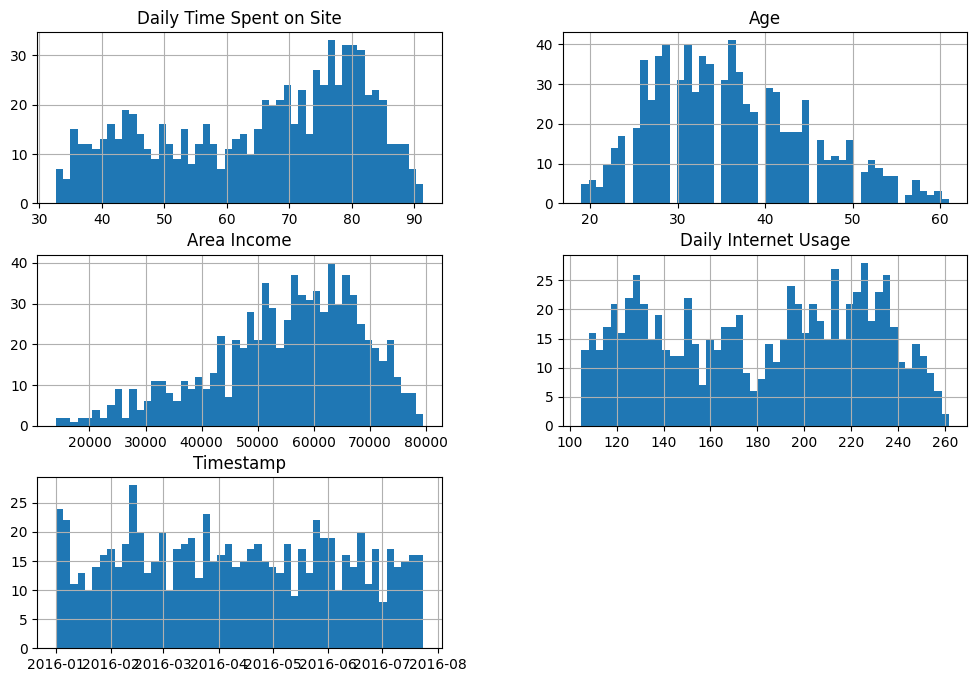

In [22]:
train_set.hist(bins=50, figsize=(12, 8)) 
plt.show()

### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

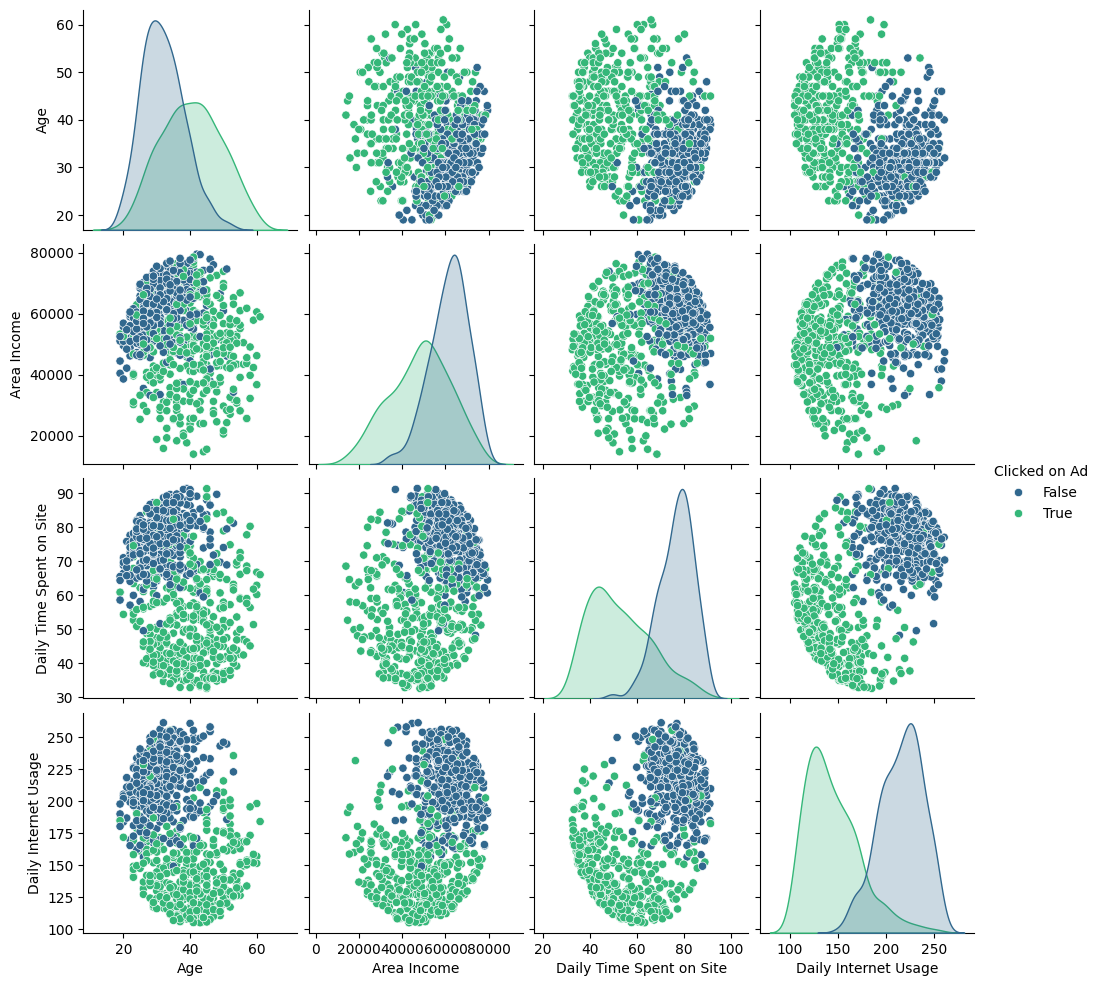

In [23]:
target = "Clicked on Ad"

variables_continuas = ["Age", "Area Income", "Daily Time Spent on Site", "Daily Internet Usage"]

mis_columnas = variables_continuas + [target]

train_set_preparado = train_set[mis_columnas]

sns.pairplot(train_set_preparado, hue=target, palette="viridis")


plt.show()

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

Los puntos que representan el clicar o no, están muy poco mezclados en todos los casos, por lo que cualquier puede ser feature.